# Epena-Gruppe

* [Funde](#Funde)
    * [Befunde](#Befunde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
    * [Matrix mit allen Pos & Verz](#Matrix-mit-allen-Pos-&-Verz)
* [Verbreitung](#Verbreitung)
* [Appendix](#Appendix)
    * [Unterscheidung I / II](#Unterscheidung-I-/-II)
    * [Mutmaßliche PIKMUN Schalen am oberen Ubangi](#Mutmaßliche-PIKMUN-Schalen-am-oberen-Ubangi)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'EPE'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Formen

In [2]:
sql = """SELECT
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Ort.ort_fluss,
           t_Komplex.bef_nr,
           t_Komplex.bef_art,
           t_Obj.objID,
           t_Obj.Scherbe,
           t_Obj.Anzahl,
           t_Obj.Form_Gef,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Typ) Like '%EPE%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [3]:
a = pd.Series({'GE':np.sum(df['Anzahl'].loc[df['Anzahl'] == 1]),
               'Ausgezählt':np.sum(df['Anzahl'].loc[df['Anzahl'] != 1])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Ausgezählt,240.0,40.40404
GE,354.0,59.59596


In [4]:
# nur einzeln aufgenommene GE
df_ge = df.loc[df['Anzahl'] == 1]

df_pivot = df_ge.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl
ort_fluss     Ort                      bef_nr        
Likwala-Esobe Bojenjo (Fpl. 292)       87/101    14.0
              Bokuma (Fpl. 295)        87/101     2.0
              Boleko (Fpl. 285)        87/1       3.0
                                       87/101     9.0
                                       87/501     1.0
              Botongo (Fpl. 302)       87/101     3.0
              Botwale (Fpl. 286)       87/101     4.0
              Bwanela (Fpl. 298)       87/102     1.0
              Ebambe (Fpl. 297)        87/101    63.0
              Epena (Fpl. 306)         87/101     5.0
              Ilebo (Fpl. 287)         87/101     1.0
              Itanga (Fpl. 305)        87/101     3.0
                                       87/103    21.0
              Jeke (Fpl. 303)          87/101    19.0
                                       87/501     1.0
              Likunda (Fpl. 300)       87/101    22.0
              Lokolélé (Fpl. 290)      87/101     2.0
              Mosenge (Fpl. 299)       87/101    39.0
                                       87/102    11.0
              Mosengi (Fpl. 296)       87/101    53.0
              Munda (Fpl. 304)         87/101    25.0
              Ngombe (Fpl. 283)        87/101     5.0
              Yumba (Fpl. 289)         87/101     9.0
                                       87/102     4.0
                                       87/103     2.0
Sangha        Bobusa (Fpl. 239)        87/102     4.0
              Bonga (Fpl. 238)         87/102     2.0
              Leme (Fpl. 269)          87/101     1.0
              Loboko (Fpl. 248)        87/101     2.0
              Mitula (Fpl. 251)        87/102     1.0
              Monjolomba (Fpl. 243)    87/101     1.0
              Pikunda (Fpl. 255)       87/101     2.0
                                       87/2       1.0
              Sangha Fkm 72 (Fpl. 242) 87/072     1.0
              Sangha Fkm 85 (Fpl. 244) 87/085     1.0
              Sosolo (Fpl. 241)        87/101     4.0
Zaire/Kongo   Gombe (Fpl. 237)         87/101     7.0
              Maberu (Fpl. 235)        87/101     2.0
              Sungu (Fpl. 236)         87/101     3.0

In [5]:
a = pd.Series({'sicher':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'] == 'EPE']),
               'fraglich':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'].str.contains(' ')])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,102.0,28.895184
sicher,251.0,71.104816


In [6]:
# nur ausgezählte Stücke
df_a = df.loc[df['Anzahl'] != 1]

In [7]:
df_a.pivot_table(values = 'Anzahl', index = 'Typ', columns = 'Scherbe', aggfunc = np.sum, margins = True)

Scherbe,B,G,R,W,All
Typ,,,,,
EBA/EPE (?),NaN,NaN,28.0,NaN,28.0
EPE,9.0,NaN,81.0,64.0,154.0
EPE (?),NaN,NaN,21.0,24.0,45.0
EPE/BOT (?),NaN,NaN,9.0,NaN,9.0
MKA/EPE (?),NaN,NaN,NaN,4.0,4.0
All,9.0,NaN,139.0,92.0,240.0


In [8]:
df_pivot = df_a.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum, fill_value = '')
df_pivot

Anzahl
ort_fluss     Ort                 bef_nr       
Likwala-Esobe Bojenjo (Fpl. 292)  87/101     14
              Boleko (Fpl. 285)   87/101      5
              Botwale (Fpl. 286)  87/101      3
              Ebambe (Fpl. 297)   87/101     61
              Itanga (Fpl. 305)   87/103     10
              Jeke (Fpl. 303)     87/101     10
              Likunda (Fpl. 300)  87/101       
              Lokolélé (Fpl. 290) 87/101      5
              Misongo (Fpl. 288)  87/101      9
              Mosenge (Fpl. 299)  87/101     82
              Mosengi (Fpl. 296)  87/101     41
              Munda (Fpl. 304)    87/101       
Sangha        Sosolo (Fpl. 241)   87/101

### Befunde

In [9]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'bef_art', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
bef_art,,
Grab,3.0,0.505051
Grube,1.0,0.168350
Oberfl,588.0,98.989899
rezent,2.0,0.336700


Nur die Stücke aus den Gräbern:

In [10]:
df[df['bef_art'] == 'Grab']

,ort_kurz,Ort,ort_fluss,bef_nr,bef_art,objID,Scherbe,Anzahl,Form_Gef,Typ
6,BLK,Boleko (Fpl. 285),Likwala-Esobe,87/1,Grab,1130,R,1.0,G2,EPE
33,BLK,Boleko (Fpl. 285),Likwala-Esobe,87/1,Grab,1520,G,1.0,E1,EPE/MKA (?)
38,BLK,Boleko (Fpl. 285),Likwala-Esobe,87/1,Grab,1531,R,1.0,A3,EPE (?)


In [11]:
df[df['bef_art'] == 'Grube']

,ort_kurz,Ort,ort_fluss,bef_nr,bef_art,objID,Scherbe,Anzahl,Form_Gef,Typ
378,PIK,Pikunda (Fpl. 255),Sangha,87/2,Grube,4991,W,1.0,G4,EPE (?)


## Scherbentypen

In [12]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
# df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,24.0,4.067797
R,331.0,56.101695
W,213.0,36.101695
B,22.0,3.728814


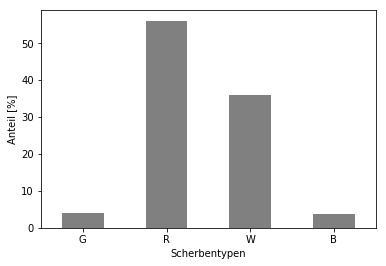

In [13]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

In [14]:
# Verhältnis Grabungs- vs. Surveyfunde:

sql = """SELECT
           t_Obj.objID,
           t_Komplex.bef_art,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Komplex.bef_art) NOT LIKE '%Ober%')
           AND ((t_Obj.Anzahl) != ''))""".replace('\n',' ')

a = pd.read_sql(sql, con)
#a['Anzahl'] = pd.to_numeric(a['Anzahl'])
a_sum = a['Anzahl'].sum()

sql = """SELECT
           t_Obj.objID,
           t_Komplex.bef_art,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Komplex.bef_art) LIKE '%Ober%')
           AND ((t_Obj.Anzahl) != ''))""".replace('\n',' ')

b = pd.read_sql(sql, con)
#a['Anzahl'] = pd.to_numeric(a['Anzahl'])
b_sum = b['Anzahl'].sum()

In [15]:
len(a)

6

In [16]:
a_sum / (a_sum + b_sum)* 100

1.0101010101010102

In [17]:
b_sum / (a_sum + b_sum)* 100

98.98989898989899

In [18]:
b_sum

588

In [19]:
# nur Gefäße:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%EPE%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Scherbe) = 'G'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [20]:
df_pivot = df.pivot_table(values = 'Anzahl', index = ['Ort', 'bef_nr'], aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

Anzahl  Prozent
Ort                bef_nr                 
Boleko (Fpl. 285)  87/1         1      4.0
                   87/501       1      4.0
Ebambe (Fpl. 297)  87/101       1      4.0
Itanga (Fpl. 305)  87/103       7     28.0
Jeke (Fpl. 303)    87/101       2      8.0
                   87/501       1      4.0
Mosenge (Fpl. 299) 87/101       1      4.0
                   87/102       6     24.0
Mosengi (Fpl. 296) 87/101       2      8.0
Munda (Fpl. 304)   87/101       2      8.0
Yumba (Fpl. 289)   87/101       1      4.0

## Technologische Merkmale (*fabrics*)

In [21]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%EPE%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [22]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


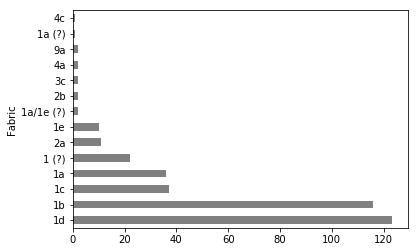

In [23]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [24]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
1d,123,33.514986
1b,116,31.607629
1c,37,10.081744
1a,36,9.809264
1 (?),22,5.994550


In [25]:
a = pd.Series({'Typ 1':np.sum(df['Anzahl'].loc[df['Fabric'].str.contains("1")]),
               'Nicht-Typ 1':np.sum(df['Anzahl'].loc[~df['Fabric'].str.contains("1")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Nicht-Typ 1,20,5.449591
Typ 1,347,94.550409


In [26]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,268.0,81.212121
wenig,50.0,15.151515
mittel,9.0,2.727273
viel,3.0,0.909091
sehr viel,NaN,NaN


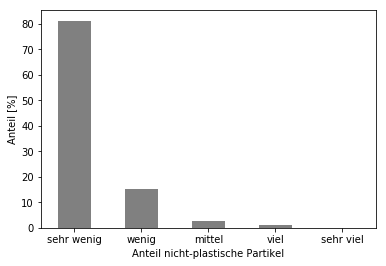

In [27]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [28]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,237.0,71.818182
F,56.0,16.969697
M,30.0,9.090909
C,7.0,2.121212
VC,NaN,NaN


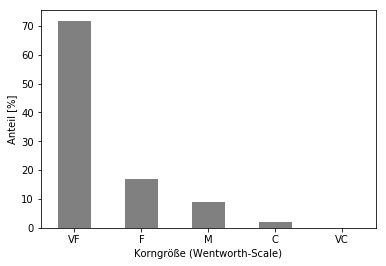

In [29]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [30]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,286,86.666667
S/Org?,11,3.333333
S/Gl,8,2.424242
S/Schamott?,5,1.515152
S?,4,1.212121
,3,0.909091
S/Schamott,2,0.606061
Schamott,2,0.606061
Schamott???,1,0.303030


## Brennfarbe

In [31]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,29,7.712766
Sonstig,94,25.000000
Weiß,253,67.287234


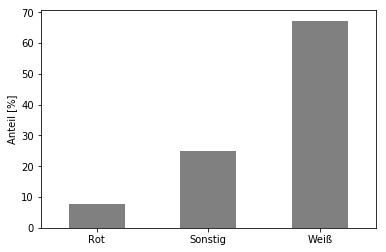

In [32]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [33]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

g        115
s        100
bg        88
          65
          16
g s       14
bg bg     11
br        10
s s        9
g bg       8
dtype: int64

### Gefäßformen

In [34]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [35]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,110,33.536585
sicher,218,66.463415


In [36]:
a[0].sum()

328

In [37]:
# nur sichere Gef
df1 = df.loc[~df['Form_Gef'].str.contains(" |/")]
# fragliche Gef
df2 = df.loc[df['Form_Gef'].str.contains(" |/")]

In [38]:
df_pivot1 = df1.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot1 = pd.DataFrame(df_pivot1)

df_pivot2 = df2.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot2 = pd.DataFrame(df_pivot2)

In [39]:
# mit .isin nur noch solche Einträge auswählen, die sicher 'Pikunda-Munda' sind (ohne ? oder anderen Kram)
dfFilter = [style]
df1 = df1[df1['Typ'].isin(dfFilter)]
# display(df1.head())
# display(df1.head())

In [40]:
df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# df_pivot

In [41]:
df_pivot['objID'].sum()

172

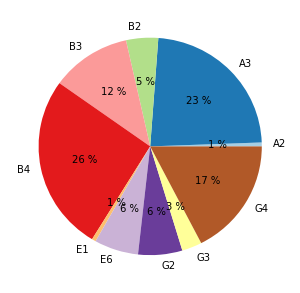

In [42]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.savefig('../output/figs/3-1-2-12_Epena_GefForm2.pdf', bbox_inches='tight')

### Proportionen

In [43]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%EPE%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# display(df.head())

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['maxD-muendH'] = df['maxD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['minD']

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

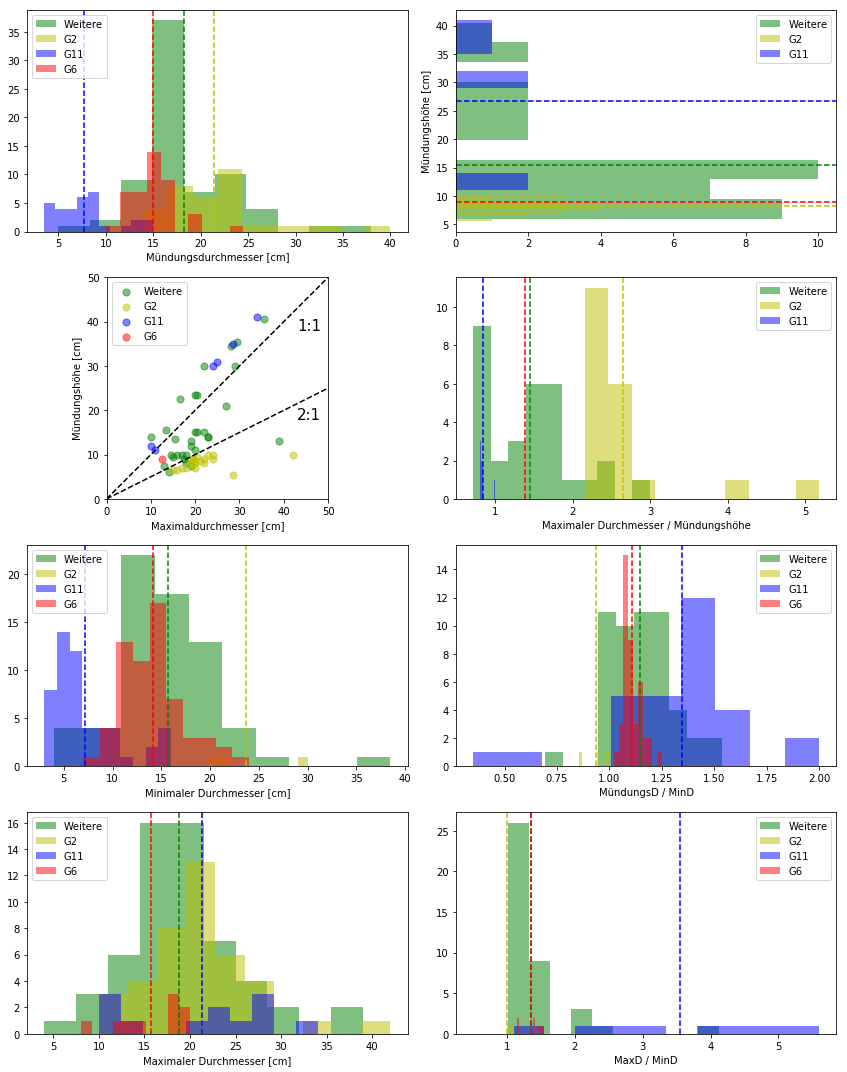

In [44]:
a = df.loc[df['Form_Gef'].str.contains("B4")]
b = df.loc[df['Form_Gef'].str.contains("A3")]
c = df.loc[df['Form_Gef'].str.contains("G4")] 
d = df.loc[~df['Form_Gef'].str.contains("B4|A3|G4")]

fig = plt.figure(1)
fig.set_size_inches(12,15)

ax = plt.subplot(421)

d['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
c['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G2', alpha = 0.5)
b['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G11', alpha = 0.5)
a['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G6', alpha = 0.5)

plt.axvline(d['muendungsD'].mean(), color='g', linestyle = '--')
plt.axvline(c['muendungsD'].mean(), color='y', linestyle = '--')
plt.axvline(b['muendungsD'].mean(), color='b', linestyle = '--')
plt.axvline(a['muendungsD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.xlabel("Mündungsdurchmesser [cm]")
plt.legend(loc = 2)

ax = plt.subplot(422)

d['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5, orientation='horizontal')
c['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G2', alpha = 0.5, orientation='horizontal')
b['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G11', alpha = 0.5, orientation='horizontal')
# a['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G6', alpha = 0.5, orientation='horizontal')

plt.axhline(d['muendungsH'].mean(), color='g', linestyle = '--')
plt.axhline(c['muendungsH'].mean(), color='y', linestyle = '--')
plt.axhline(b['muendungsH'].mean(), color='b', linestyle = '--')
plt.axhline(a['muendungsH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

# df['muendungsH'].hist(histtype='stepfilled', orientation='horizontal')
plt.ylabel("Mündungshöhe [cm]")

ax = plt.subplot(423)

plt.scatter(d['maxD'], d['muendungsH'], alpha=0.5, c = 'g', s = 50, label = 'Weitere')
plt.scatter(c['maxD'], c['muendungsH'], alpha=0.5, c = 'y', s = 50, label = 'G2')
plt.scatter(b['maxD'], b['muendungsH'], alpha=0.5, c = 'b', s = 50, label = 'G11')
plt.scatter(a['maxD'], a['muendungsH'], alpha=0.5, c = 'r', s = 50, label = 'G6')#
plt.legend(loc = 2)
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

ax.plot([0, 10,20,30,50],[0, 10,20,30,50], color='black', linestyle = '--')
ax.text(43, 38, '1:1', color='black', fontsize=15)

ax.plot([0, 10,20,30,50],[0, 5,10,15,25], color='black', linestyle = '--')
ax.text(43, 18, '2:1', color='black', fontsize=15)

plt.xlim(0,50) 
plt.ylim(0,50) 

ax.set_aspect('equal')

ax = plt.subplot(424)

d['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
c['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G2', alpha = 0.5)
b['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G11', alpha = 0.5)
#a['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G6', alpha = 0.5)

plt.axvline(d['maxD-muendH'].mean(), color='g', linestyle = '--')
plt.axvline(c['maxD-muendH'].mean(), color='y', linestyle = '--')
plt.axvline(b['maxD-muendH'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD-muendH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

# df['maxD-muendH'].hist(histtype='stepfilled', fc='#CCCCCC')
plt.xlabel("Maximaler Durchmesser / Mündungshöhe")

ax = plt.subplot(425)

d['minD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
c['minD'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G2', alpha = 0.5)
b['minD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G11', alpha = 0.5)
a['minD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G6', alpha = 0.5)

plt.axvline(d['minD'].mean(), color='g', linestyle = '--')
plt.axvline(c['minD'].mean(), color='y', linestyle = '--')
plt.axvline(b['minD'].mean(), color='b', linestyle = '--')
plt.axvline(a['minD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

#df['minD'].hist(histtype='stepfilled', fc='#86B404')
plt.xlabel("Minimaler Durchmesser [cm]")

ax = plt.subplot(426)

d['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
c['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G2', alpha = 0.5)
b['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G11', alpha = 0.5)
a['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G6', alpha = 0.5)

plt.axvline(d['muend-min'].mean(), color='g', linestyle = '--')
plt.axvline(c['muend-min'].mean(), color='y', linestyle = '--')
plt.axvline(b['muend-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['muend-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

#df['muend-min'].hist(histtype='stepfilled', fc='#E1F5A9')
#plt.axvline(df['muend-min'].mean(), color='r', linestyle = '--')
# plt.legend(["Mittelwert"])
plt.xlabel("MündungsD / MinD")

ax = plt.subplot(427)

d['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
c['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G2', alpha = 0.5)
b['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G11', alpha = 0.5)
a['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G6', alpha = 0.5)

plt.axvline(d['maxD'].mean(), color='g', linestyle = '--')
plt.axvline(c['maxD'].mean(), color='y', linestyle = '--')
plt.axvline(b['maxD'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

# df['maxD'].hist(histtype='stepfilled', fc='#2E64FE')
plt.xlabel("Maximaler Durchmesser [cm]")

ax = plt.subplot(428)

d['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
c['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'y', label = 'G2', alpha = 0.5)
b['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G11', alpha = 0.5)
a['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G6', alpha = 0.5)

plt.axvline(d['max-min'].mean(), color='g', linestyle = '--')
plt.axvline(c['max-min'].mean(), color='y', linestyle = '--')
plt.axvline(b['max-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['max-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

# df['max-min'].hist(histtype='stepfilled', fc='#81BEF7')
# plt.axvline(df['max-min'].mean(), color='r', linestyle = '--')
plt.legend(["Mittelwert"])
plt.legend(loc = 1)
plt.xlabel("MaxD / MinD")

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-12_Epena_Keramik-Abmessungen.pdf', bbox_inches='tight')
plt.show()

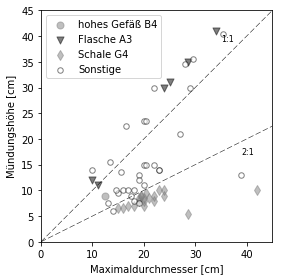

In [45]:
fig = plt.figure(1)
#fig.set_size_inches(10,10)

ax = plt.subplot(111)

plt.scatter(a['maxD'], a['muendungsH'], alpha=0.5, c = 'grey', s = 50, marker = "o", label = 'hohes Gefäß B4')
plt.scatter(b['maxD'], b['muendungsH'], alpha=0.5, c = 'black', s = 50, marker = "v", label = 'Flasche A3')#
plt.scatter(c['maxD'], c['muendungsH'], alpha=0.5, c = 'grey', s = 50, marker = "d", label = 'Schale G4')
plt.scatter(d['maxD'], d['muendungsH'], alpha=0.5, facecolors='white', edgecolors='black', s = 30, marker = "o", label = 'Sonstige')
plt.legend(loc = 2)
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

ax.plot([0, 10,20,50],[0, 10,20,50], color='black', linestyle = '--', linewidth=0.5)
ax.text(35, 39, '1:1', color='black', fontsize=8)

ax.plot([0, 10,20,50],[0, 5,10,25], color='black', linestyle = '--', linewidth=0.5)
ax.text(39, 17, '2:1', color='black', fontsize=8)

plt.xlim(0,45) 
plt.ylim(0,45) 

ax.set_aspect('equal')
plt.tight_layout()

#plt.savefig('../output/figs/3-1-2-2_Ngombe_Keramik-Proportionen.pdf', bbox_inches='tight')
plt.show()

In [46]:
#B4
a.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muend-min,max-min
count,42.000000,1.0,62.000000,1.0,9.000000,3.000000,2.000000,1.000000,42.000000,6.000000
mean,15.000000,9.0,14.169355,8.0,15.722222,4.833333,9.000000,1.388889,1.105373,1.353020
std,2.493895,NaN,3.245354,NaN,4.070558,2.020726,1.414214,NaN,0.046529,0.159157
min,10.000000,9.0,7.000000,8.0,8.000000,3.000000,8.000000,1.388889,1.020833,1.142857
25%,14.000000,9.0,12.000000,8.0,13.000000,3.750000,8.500000,1.388889,1.071429,1.232517
50%,15.000000,9.0,14.000000,8.0,18.000000,4.500000,9.000000,1.388889,1.090909,1.386752
75%,16.000000,9.0,15.375000,8.0,18.000000,5.750000,9.500000,1.388889,1.135606,1.458333
max,24.500000,9.0,24.000000,8.0,20.000000,7.000000,10.000000,1.388889,1.250000,1.538462


In [47]:
15/9

1.6666666666666667

In [48]:
#A3
b.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muend-min,max-min
count,32.000000,6.000000,53.000000,7.000000,12.000000,7.000000,2.000000,6.000000,30.000000,8.000000
mean,7.703125,26.666667,7.198113,21.535714,21.291667,7.142857,10.250000,0.847223,1.345914,3.544643
std,3.034371,12.372011,3.446486,10.813214,8.362411,3.682326,7.424621,0.075939,0.319576,1.521569
min,3.500000,11.000000,3.000000,2.750000,10.000000,1.500000,5.000000,0.800000,0.350000,1.100000
25%,5.375000,16.500000,5.000000,17.000000,12.500000,5.250000,7.625000,0.808410,1.200000,2.667857
50%,7.000000,30.500000,6.000000,25.000000,23.000000,8.000000,10.250000,0.821777,1.400000,3.583333
75%,9.000000,34.000000,9.000000,28.500000,28.125000,8.500000,12.875000,0.832317,1.500000,4.650000
max,15.000000,41.000000,16.000000,32.000000,34.000000,13.000000,15.500000,1.000000,2.000000,5.600000


In [49]:
26/21

1.2380952380952381

In [50]:
#G4
c.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muend-min,max-min
count,34.000000,21.000000,3.000000,2.0,40.000000,20.000000,2.000000,20.000000,3.000000,1.0
mean,21.367647,8.214286,23.666667,5.5,21.275000,5.775000,3.500000,2.649718,0.935714,1.0
std,5.344650,1.260669,5.507571,0.0,5.698572,1.292438,4.949747,0.739874,0.072492,NaN
min,14.000000,5.500000,20.000000,5.5,10.000000,3.000000,0.000000,2.157895,0.857143,1.0
25%,18.000000,7.000000,20.500000,5.5,18.375000,5.000000,1.750000,2.305769,0.903571,1.0
50%,21.000000,8.500000,21.000000,5.5,20.750000,5.750000,3.500000,2.436508,0.950000,1.0
75%,22.375000,9.000000,25.500000,5.5,23.250000,6.625000,5.250000,2.595238,0.975000,1.0
max,40.000000,10.000000,30.000000,5.5,42.000000,7.500000,7.000000,5.181818,1.000000,1.0


In [51]:
100-(21/40*100)

47.5

## Mündungs- und Randformen

In [52]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

# Zeilen ohne Mdg löschen
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Mdg'])
df1['Form_Mdg'] = df1['Form_Mdg'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Mdg'] = df1['Form_Mdg'].apply(lambda x: x.split('/')[0])\

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot.head()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M3,140,65.727700
M5,22,10.328638
M6,20,9.389671
M1,16,7.511737
M2,9,4.225352


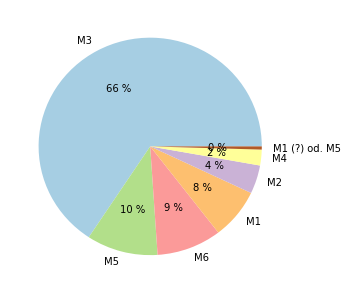

In [53]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [54]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Rand'])
df1['Form_Rand'] = df1['Form_Rand'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Rand'] = df1['Form_Rand'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1,71,29.460581
A1,68,28.215768
B3.3,36,14.937759
B1.2,23,9.543568
B1.1,15,6.224066


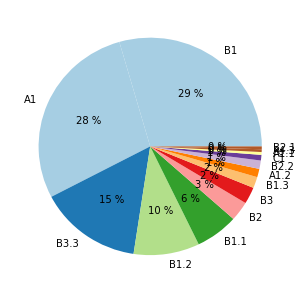

In [55]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


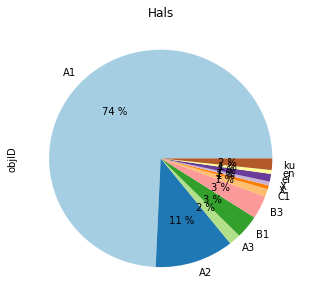

In [56]:
a = df.dropna(subset = ['Form_Hals'])
a['Form_Hals'] = a['Form_Hals'].map(lambda x: str(x)[:2])

df_pivot = a.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


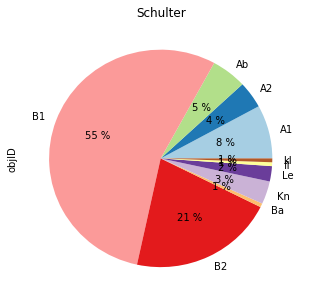

In [57]:
b = df.dropna(subset = ['Form_Schulter'])
b['Form_Schulter'] = b['Form_Schulter'].map(lambda x: str(x)[:2])

df_pivot = b.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

## Boden

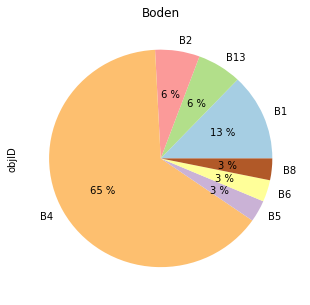

In [58]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# Fragezeichen löschen
df['Form_Boden'] = df['Form_Boden'].map(lambda x: x.rstrip(' (?)'))
df['Form_Boden'] = df['Form_Boden'].apply(lambda x: x.split('/')[0])\

df_pivot = df.pivot_table(values = 'objID', index = 'Form_Boden', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
#df_pivot

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Boden")

In [59]:
len(df['Form_Boden'])

31

In [60]:
df.pivot_table(values = 'objID', index = 'Form_Boden', columns='Form_Gef', aggfunc = len)

Form_Gef,A2,A3,B3,B4 (?),E1,E6,G2,G3,G4,G4 (?),G5 (?)
Form_Boden,,,,,,,,,,,
B1,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN
B13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
B2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
B4,1.0,2.0,7.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN
B8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


## Verzierungen

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


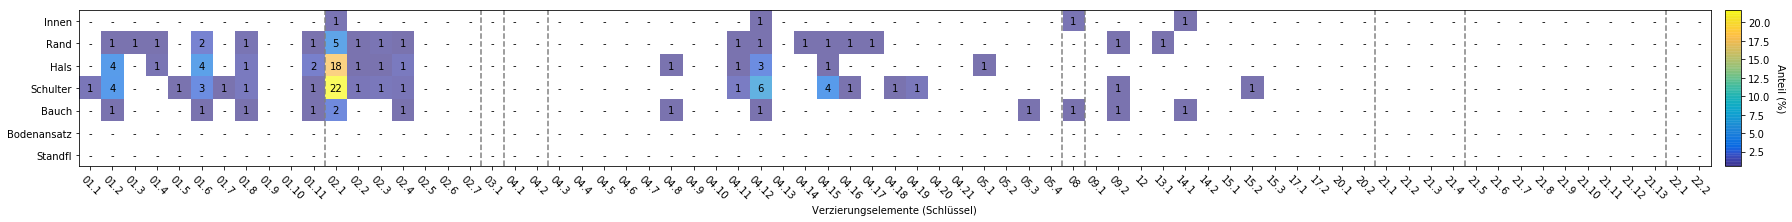

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-12_Epena_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [3]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.Anzahl,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
            [t_Obj].[Verz_PosUnbekannt] || '/' || [t_Obj].[Verz_Innen_Rand/Hals/berteil] || '/' || [t_Obj].[Ver_Rand] || '/' || [t_Obj].[Verz_Oberteil] || '/' || [t_Obj].[Verz_Hals] || '/' || [t_Obj].[Verz_Schulter] || '/' || [t_Obj].[Verz_Bauch] || '/' || [t_Obj].[Verz_Unterteil] || '/' || [t_Obj].[Verz_Bodenansatz] || '/' || [t_Obj].[Ver_Standfl] AS ObjVerz
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            LEFT JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            LEFT JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            LEFT JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['pos'].fillna('unverz', inplace=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', columns = 'pos', aggfunc = len)

a = pd.Series({'unverziert':len(df_pivot.loc[df_pivot['unverz'] == 1]),
               'verziert':len(df_pivot.loc[df_pivot['unverz'] != 1])})
a = pd.DataFrame(a)
a = a.rename(columns={0:'Anzahl'})
a['Prozent'] = a['Anzahl']/a['Anzahl'].sum()*100
a

,Anzahl,Prozent
unverziert,124,31.155779
verziert,274,68.844221


In [4]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

df_pivot.describe()

,Anzahl
count,398.000000
mean,1.894472
std,1.201980
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


In [63]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
#display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


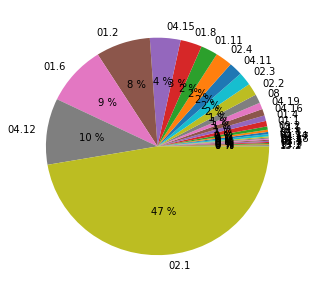

In [64]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%')
plt.ylabel('')

In [65]:
a = pd.Series({'Riefen und Rillen':len(df.loc[df['verzName'].str.contains("01.|02.")].index),
               'Sonstiges':len(df.loc[~df['verzName'].str.contains("01.|02.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Riefen und Rillen,475,77.996716
Sonstiges,134,22.003284


In [66]:
a = pd.Series({'Eindrücke':len(df.loc[df['verzName'].str.contains("04.|05.")].index),
               'Sonstiges':len(df.loc[~df['verzName'].str.contains("04.|05.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Eindrücke,119,19.54023
Sonstiges,490,80.45977


In [67]:
a = pd.Series({'Riefen und Rillen':len(df.loc[df['verzName'].str.contains("01.|02.")].index),
               'Sonstiges':len(df.loc[~df['verzName'].str.contains("01.|02.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Riefen und Rillen,475,77.996716
Sonstiges,134,22.003284


In [68]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
pos,,
1 Innen,11,1.806240
2 Rand,67,11.001642
3 Hals,215,35.303777
4 Schulter,284,46.633826
5 Bauch,32,5.254516


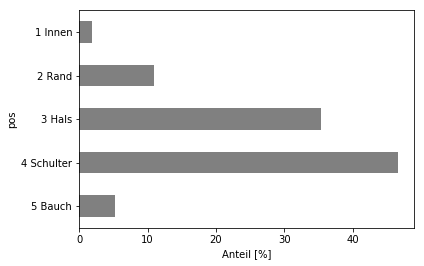

In [69]:
df_pivot = df_pivot.sort_index(ascending=False)

df_pivot.plot(y = 'Prozent', kind = 'barh', legend = None, color = 'grey')
plt.xlabel('Anteil [%]')
plt.show()

In [70]:
df_pivot.at['3 Hals','Prozent'] + df_pivot.at['4 Schulter','Prozent']

81.937602627257803

## Verbreitung

In [71]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
18,Maberu (Fpl. 235),235,17.257014,-1.069018,EPE (?)
21,Sungu (Fpl. 236),236,17.334786,-1.033313,EPE
8,Gombe (Fpl. 237),237,17.580406,-0.704069,EPE
4,Bonga (Fpl. 238),238,16.873263,-1.117121,EPE
0,Bobusa (Fpl. 239),239,16.917098,-1.052349,EPE
29,Sosolo (Fpl. 241),241,17.128605,-0.892241,EPE (?)
20,Sangha Fkm 72 (Fpl. 242),242,17.197602,-0.699290,EPE
15,Monjolomba (Fpl. 243),243,17.174576,-0.684421,EPE
28,Sangha Fkm 85 (Fpl. 244),244,17.148883,-0.653186,EPE (?)
16,Loboko (Fpl. 248),248,17.130913,-0.109189,EPE (?)


In [72]:
df.to_csv("../data/processed/3-1-2-12_EPE_Verbreitung.csv", index = False)

## Tafeln

In [73]:
# damit alle Zeilen angezeigt werden:
pd.set_option('display.max_rows', None)

In [74]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,28,1,MBR,87/101,NaN,105,PKM/EPE (?),F3/F5 (?),None,None
1,30,10,MBR,87/101,NaN,102,EPE (?),F5 (?),None,None
2,35,6,BBS,87/102,NaN,72,EPE (?),A2/A3 (?),None,None
3,36,15,SSL,87/101,NaN,46,EPE (?),A2/A3,B1.1,None
4,36,19,SSL,87/101,25,"21, 25",EPE/BOT (?),None,None,None
5,36,21,SSL,87/101,21,"21, 25",EPE/BOT (?),None,None,None
6,38,13,SGH 72,87/072,NaN,1,EPE,A3,B1.1,None
7,52,21,PIK,87/101,NaN,72,EPE (?),G4 (?),A1 (?),None
8,61,16,LMS,87/101,NaN,32,EPE,B2,B1/B2,None
9,68,4,BLK,87/1,GE 3,2,EPE/MKA (?),E1,B1,B1


# Appendix

Funde vom eponymen Fpl. Epena:

In [75]:
sql = """SELECT
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Ort.ort_fluss,
           t_Komplex.bef_nr,
           t_Komplex.bef_art,
           t_Obj.objID,
           t_Obj.Scherbe,
           t_Obj.Anzahl,
           t_Obj.Form_Gef,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (t_Ort.ort_kurz = 'EPE')""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,Ort,ort_fluss,bef_nr,bef_art,objID,Scherbe,Anzahl,Form_Gef,Typ
0,EPE,Epena (Fpl. 306),Likwala-Esobe,87/101,Oberfl,3741,W,1,None,EPE (?)
1,EPE,Epena (Fpl. 306),Likwala-Esobe,87/101,Oberfl,3742,W,1,None,EPE (?)
2,EPE,Epena (Fpl. 306),Likwala-Esobe,87/101,Oberfl,3743,R,1,None,EPE (?)
3,EPE,Epena (Fpl. 306),Likwala-Esobe,87/101,Oberfl,3744,W,5,None,None
4,EPE,Epena (Fpl. 306),Likwala-Esobe,87/101,Oberfl,3745,W,2,None,None
5,EPE,Epena (Fpl. 306),Likwala-Esobe,87/101,Oberfl,3746,R,2,None,None
6,EPE,Epena (Fpl. 306),Likwala-Esobe,87/101,Oberfl,3747,R,1,None,None
7,EPE,Epena (Fpl. 306),Likwala-Esobe,87/101,Oberfl,3748,W,4,None,None
8,EPE,Epena (Fpl. 306),Likwala-Esobe,87/101,Oberfl,3749,W,1,None,None
9,EPE,Epena (Fpl. 306),Likwala-Esobe,87/101,Oberfl,3750,W,1,B4,EPE
